# Scikit-learn

In [1]:
from sklearn import datasets
diabetes = datasets.load_diabetes()  
X = diabetes.data # 442 observation , 10 features
y = diabetes.target

In [2]:
X.shape

(442, 10)

In [3]:
y.shape

(442,)

In [4]:
feature_names=['age', 'sex', 'bmi', 'bp',
               's1', 's2', 's3', 's4', 's5', 's6']

# Scikit example regression

In [5]:
import warnings; warnings.simplefilter('ignore')  # to suppress warnings

import numpy as np
from sklearn import datasets
from sklearn.linear_model import Lasso

from sklearn import linear_model, datasets 
from sklearn.model_selection import GridSearchCV 
# Grid search CV will automatically try the Lasso regression on a given set of alpha values and give us
#the best score and corresponding value of Alpha

diabetes = datasets.load_diabetes()
# We will split our data into separate test and train sets of data 
# (train is used to train the model and test is used for 
# model performance testing and evaluation).

X_train = diabetes.data[:310] # 0 to 309 observations i.e 310 records
y_train=diabetes.target[:310]

X_test = diabetes.data[310:] 
y_test=diabetes.target[310:]


# Lasso model
lasso = Lasso(random_state=0)  # random_state is like a seed point 
alphas = np.logspace(-4, -0.5, 30) #logspace(start,end, count)
# logspace computes its start and end points as
# base**start and base**stop respectively. 
# here start = -4 means 10**-4 i.e. 0.0001
# stop = -0.5 means 10**-0.5 i.e. 3.162277
# num = 30 means total number of values as 30 between the start and end range
# Numpy logspace return numbers spaced evenly on a log scale.


estimator = GridSearchCV(lasso,param_grid = dict(alpha=alphas))
# GridSearchCV finds the lasso model.
# this means the lasso model with the best hyperparameter
# Our hyperparameter here is alpha
# GridSearchCV test the lasso model performance for each alpha
# and finally creates a lasso model estimator object with the most optimum 
# alpha value.
"""
How does GridSearchCV find the best alpha value for lasso model with out data?

Ans : 
GridSearchCV makes 30 objects of Lasso and thenn we use the command to view the results:
estimator.fit(X_train, y_train) will automatically try the Lasso regression on the set of alpha values 
and select that model which gives least residual error is automatically.
"""

#Alph can range from 0 to any +ve value
# ALpha=1 reduces the value of coefficients to almost 0
estimator.fit(X_train, y_train)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.0...
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [6]:
alphas

array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04, 4.01280703e-04, 5.29831691e-04, 6.99564216e-04,
       9.23670857e-04, 1.21957046e-03, 1.61026203e-03, 2.12611233e-03,
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])

In [7]:
estimator.best_score_ # Best Lasso model gives 46.54%


0.4654063759023531

In [8]:
estimator.best_estimator_ #SO for of 0.02 lasso model gave the least error in regression 


Lasso(alpha=0.02592943797404667, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

In [9]:
estimator.predict(X_test)[:10]  # type your comment here


array([203.42104984, 177.6595529 , 122.62188598, 212.81136958,
       173.61633075, 114.76145025, 202.36033584, 171.70767813,
       164.28694562, 191.29091477])

# Basics of Scikit learn

In [10]:
import seaborn as sns
iris=sns.load_dataset('iris')
iris.head() 




,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


![flower_image_sepal_petal](./datasets_n_images/images/flower_image_sepal_petal.jpg 'flower_image_sepal_petal')

In [11]:
# Dropping the species of the flower , as it is the target variable
X_iris = iris.drop('species', axis=1)#axis=1 means search for 'species' rowwise
X_iris.shape



(150, 4)

In [12]:
# Only species form the target varible. 
y_iris = iris['species']
y_iris.shape



# i.e we will predict the species according to the features matrix

(150,)

![structure of feature matrix and target array](./datasets_n_images/images/features_target_image.png "structure of feature matrix and target array")

# Steps to use Scikit-Learn 

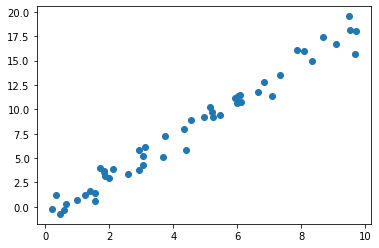

In [13]:
# As an example of this process, let’s consider a simple linear regression
# that is, the common case of fitting a line to x, y data. 
# We will use the following simple data for our regression example :

import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)  # RandomState() and seed() both define seed

# we are randomly producing some 50 (x,y) values
x = 10 * rng.rand(50)  
y = 2 * x - 1 + rng.randn(50)

# making a scatter plot, to see our 50 points 
plt.scatter(x,y)
plt.show()




In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
# For our linear regression example, we can instantiate the LinearRegression
# class and specify that we would like to fit the intercept using 
# the fit_intercept hyperparameter:

model = LinearRegression(fit_intercept=True)  
model
print(x.shape)
print(y.shape)
# If fit_intercept set to False, no intercept will be used in calculations

(50,)
(50,)


In [16]:
# type your code here
X=x[:,np.newaxis]
X.shape

(50, 1)

In [17]:
model.fit(X,y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
model.coef_   # indicates the slope


array([1.9776566])

In [19]:
model.intercept_   # indicates y intercept


-0.9033107255311164

In [20]:
# Demo Cell
temp = np.linspace(start = 0, stop = 100, num = 5)
print(temp)
# The linspace function returned an ndarray with 5 evenly spaced elements. 
# The first element is 0. The last element is 100. 
# The remaining 3 elements are evenly spaced between 0 and 100.

[  0.  25.  50.  75. 100.]


In [21]:
xfit = np.linspace(-1, 11) 
#Creates 50 uniformly spaced points in range -1 to 11
#50 is default

# How line space works ?
# https://www.sharpsightlabs.com/blog/numpy-linspace/

In [22]:
# we need to re-shape these x values into a [n_samples, n_features]
# features matrix, after which we can feed it to the model:
    
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

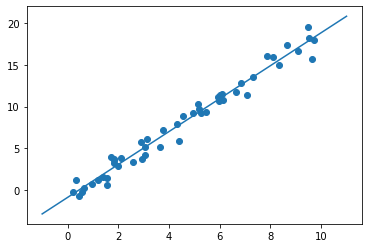

In [23]:
# let’s visualize the results by plotting first the raw data, 
# and then this model fit:

# type your code here
plt.scatter(x,y)
plt.plot(xfit,yfit)
plt.show()



In [27]:
# type your code here
from sklearn.model_selection import train_test_split
Xtrain,Xtest,y_train,y_test=train_test_split(X_iris,y_iris,random_state=1)



In [30]:
# With the data arranged, we can follow our steps to predict the labels:

# 1. choose model class
from sklearn.naive_bayes import GaussianNB 

# 2. instantiate model
model=GaussianNB()


# 3. fit model to data
model.fit(Xtrain,y_train)

# 4. predict on new data
y_model = model.predict(Xtest) 

In [ ]:
# Finally, we can use the accuracy_score utility to see 
# the fraction of predicted labels that match their true value:

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

In [32]:
# 1. Choose the model class
from sklearn.decomposition import PCA 

# 2. Instantiate the model with hyperparameters
model= PCA(n_components=2)



# 3. Fit to data. Notice y is not specified!
model.fit(X_iris) 

# 4. Transform the data to two dimensions
X_2D = model.transform(X_iris) 
print(X_2D)

# Now let’s plot the results. 
# A quick way to do this is to insert the results into the 
# original Iris DataFrame, and use Seaborn’s lmplot to show the results.

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.62523805  0.59937002]
 

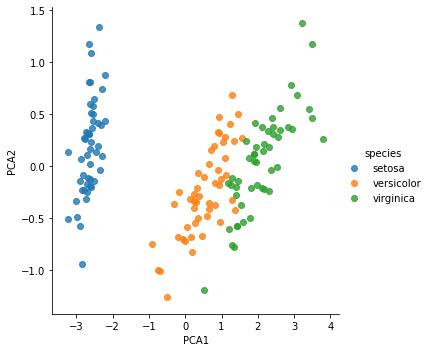

In [35]:
iris['PCA1'] = X_2D[:, 0] # all rows, 0th col
iris['PCA2'] = X_2D[:, 1] # all rows, 1st col
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

# fit_reg=False is needed to force lmplot to draw a scatter plot i.e we dnt wnt 
#to draw the regression line
# More on fit_reg here : https://github.com/mwaskom/seaborn/issues/1452

# use hue for the most important comparison. 
# Here "species" is the paramater to classify
# To know about all parameters of lmplot : see 
# https://seaborn.pydata.org/generated/seaborn.lmplot.html

Watch only first 3minutes of the video:
--

>https://www.youtube.com/watch?v=0NMC2NfJGqo

In [36]:
# 1. Choose the model class
#import sklearn.mixture 
from sklearn import mixture   

# 2. Instantiate the model w/ hyperparameters
#HW Research: What is the importance of 'covariance_type' parameter in GMM model?
#model = GaussianMixture(n_components=3, covariance_type='full')
model = mixture.GaussianMixture(n_components=3, covariance_type='full')

# 3. Fit to data. Notice y is not specified!
model.fit(X_iris)
print(type(model))

# 4. Determine cluster labels
y_gmm = model.predict(X_iris) 

<class 'sklearn.mixture.gaussian_mixture.GaussianMixture'>


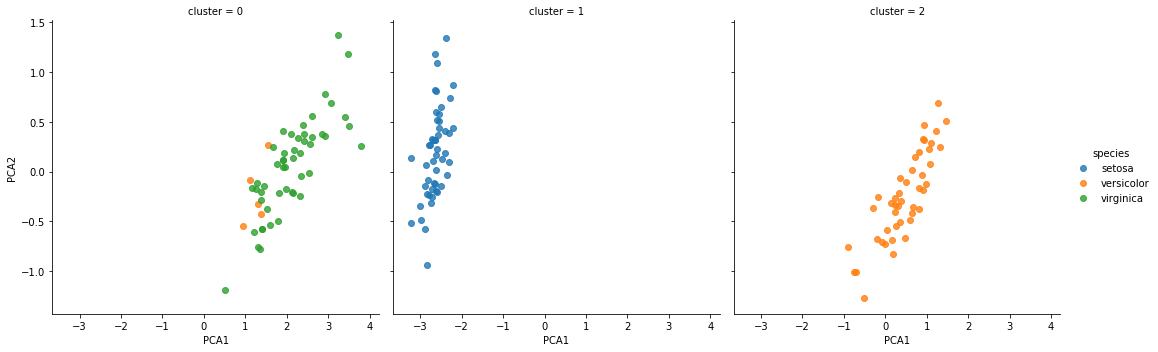

In [39]:
# we will add the cluster label to the Iris DataFrame and 
# use Seaborn to plot the results.

iris['cluster'] = y_gmm
# type your code here


sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
col='cluster', fit_reg=False);

# Recalling Scikit-learn concepts learned till now

HomeWork:
--
Create your own Notebook:
>https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

Caution: 
1. You may require this:
https://github.com/Atul-Anand-Jha/Speaker-Identification-Python/issues/6
2. Skip Cell 11, 12, 14, 15, 16, 22, 23, 24

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [2]:
# Generate some data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

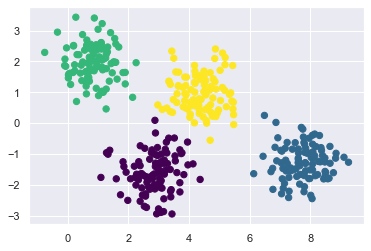

In [3]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [4]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

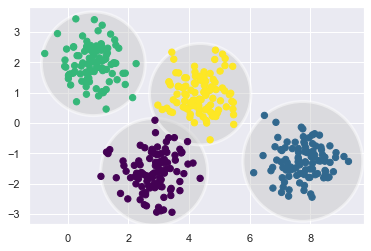

In [5]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

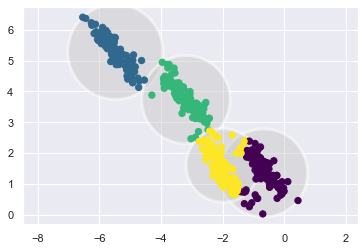

In [6]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

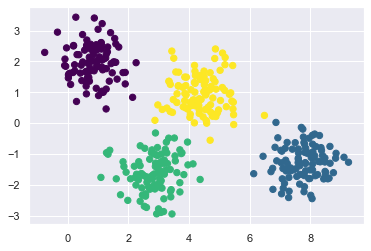

In [7]:
# Generalizing E–M: Gaussian Mixture Models
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [8]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.    0.463 0.    0.537]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    1.    0.   ]]


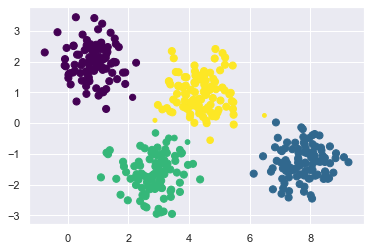

In [9]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [10]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

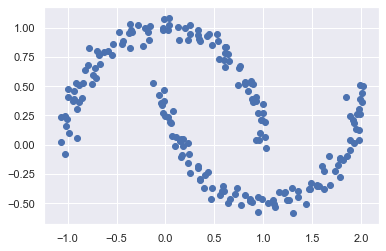

In [11]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

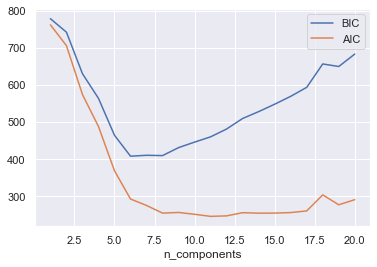

In [12]:
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(Xmoon)
          for n in n_components]

plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC')
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

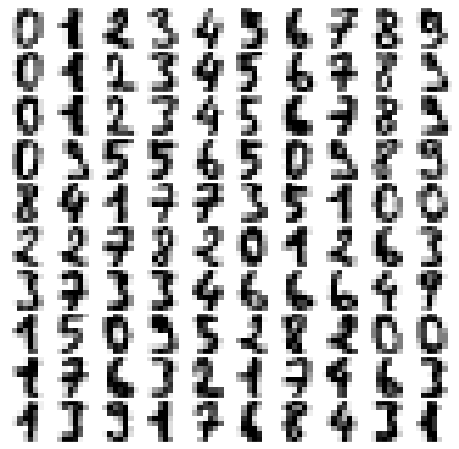

In [14]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

In [15]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

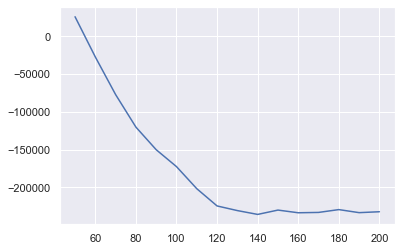

In [16]:
n_components = np.arange(50, 210, 10)
models = [GMM(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);